## The Oxford-IIIT Pet Dataset

This dataset contains 37 categories of pets with 200 images for each category. The images have an associated ground truth annotation of breed, head ROI, and pixel level trimap segmentation

# Libraries

In [42]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.6.0'

In [43]:
import random
random.seed(0)

import warnings
warnings.filterwarnings('ignore')

Let's now load the dataset

In [44]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [45]:
path = '/content/drive/My Drive/Computer Vision/Week3/'

In [46]:
from zipfile import ZipFile

with ZipFile(path+'images.zip','r') as z:
  z.extractall()

In [47]:
!ls

drive  images  __MACOSX  sample_data


In [48]:
dataset_folder = "./images/"
train_csv = path + "train-2.csv"
validation_csv =  path + "validation-3.csv"

# Training Data

In [49]:
import numpy as np
import pandas as pd
import csv

In [50]:
IMAGE_SIZE = 128

In [51]:
with open(train_csv,"r") as f:

  y_train = np.zeros((sum(1 for line in f),4))
  X_train = []
  f.seek(0)
  data = csv.reader(f,delimiter=',')
  for index,row in enumerate(data):
    #for i,r in enumerate(row[1:7]):
      #row[i+1] = r
    path,image_height,image_width,x0,y0,x1,y1, _, _ = row
    path = "./" + path.split("/")[-2] + "/" + path.split("/")[-1]
    y_train[index,0] = int(x0)*IMAGE_SIZE/int(image_width)
    y_train[index,1] = int(y0)*IMAGE_SIZE/int(image_height)
    y_train[index,2] = (int(x1)-int(x0))*IMAGE_SIZE/int(image_width)
    y_train[index,3] = (int(y1)-int(y0))*IMAGE_SIZE/int(image_height)

    X_train.append(path)

In [52]:
y_train.max()

127.66753246753247

In [53]:
y_train

array([[36.90666667, 23.04      , 19.62666667, 27.52      ],
       [24.576     , 26.88      , 73.728     , 47.616     ],
       [49.05583756, 18.176     , 59.77664975, 50.176     ],
       ...,
       [24.064     , 13.79640719, 72.704     , 86.99401198],
       [70.144     , 32.19161677, 32.768     , 47.13772455],
       [24.591133  , 15.872     , 71.56650246, 49.664     ]])

In [54]:
X_train[:5]

['./images/Abyssinian_1.jpg',
 './images/Abyssinian_10.jpg',
 './images/Abyssinian_100.jpg',
 './images/Abyssinian_101.jpg',
 './images/Abyssinian_102.jpg']

Let's check how a random image looks like

In [55]:
import cv2
import matplotlib.pyplot as plt

filename = X_train[12]
unscaled = cv2.imread(filename)
region = y_train[12]
image_height,image_width,_ = unscaled.shape

In [56]:
x0 = int(region[0] * image_width/IMAGE_SIZE)
y0 = int(region[1] * image_height/IMAGE_SIZE)

x1 = int((region[0] + region[2]) * image_width/IMAGE_SIZE)
y1 = int((region[1] + region[3]) * image_width/IMAGE_SIZE)

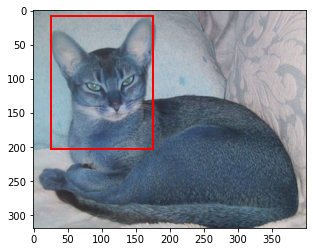

In [57]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig,ax = plt.subplots(1)

ax.imshow(unscaled)

rect = patches.Rectangle((x0,y0),x1-x0,y1-y0,linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rect)

plt.show()

# Let's prepare the data

In [58]:
X_train[0]

'./images/Abyssinian_1.jpg'

In [59]:
from PIL import Image
from tensorflow.keras.applications.mobilenet import preprocess_input

In [60]:
for i,f in enumerate(X_train):
  img = Image.open(f)
  img = img.resize((IMAGE_SIZE,IMAGE_SIZE))
  img = img.convert('RGB')

  X_train[i] = preprocess_input(np.array(img,dtype=np.float32))
  img.close()

In [61]:
X_train = np.array(X_train)

In [62]:
X_train.shape

(3006, 128, 128, 3)

In [63]:
y_train

array([[36.90666667, 23.04      , 19.62666667, 27.52      ],
       [24.576     , 26.88      , 73.728     , 47.616     ],
       [49.05583756, 18.176     , 59.77664975, 50.176     ],
       ...,
       [24.064     , 13.79640719, 72.704     , 86.99401198],
       [70.144     , 32.19161677, 32.768     , 47.13772455],
       [24.591133  , 15.872     , 71.56650246, 49.664     ]])

In [64]:
y_train.shape

(3006, 4)

# Validation Data

In [65]:
with open(validation_csv,"r") as f:

  y_val = np.zeros((sum(1 for line in f),4))
  X_val = []
  f.seek(0)

  data = csv.reader(f,delimiter=',')
  for index,row in enumerate(data):
    path,image_height,image_width,x0,y0,x1,y1,_,_ = row
    path = "./"+path.split('/')[-2] + "/" + path.split('/')[-1]
    y_val[index,0] = int(x0) * IMAGE_SIZE / int(image_width)
    y_val[index,1] = int(y0) * IMAGE_SIZE / int(image_height)
    y_val[index,2] = (int(x1) - int(x0)) * IMAGE_SIZE / int(image_width)
    y_val[index,3] = (int(y1) - int(y0)) * IMAGE_SIZE / int(image_height)

    X_val.append(path)

In [66]:
X_val[:5]

['./images/Abyssinian_118.jpg',
 './images/Abyssinian_124.jpg',
 './images/Abyssinian_131.jpg',
 './images/Abyssinian_14.jpg',
 './images/Abyssinian_15.jpg']

In [67]:
for i,f in enumerate(X_val):
  img = Image.open(f)
  img = img.resize((IMAGE_SIZE,IMAGE_SIZE))
  img = img.convert('RGB')
  
  X_val[i] = preprocess_input(np.array(img,dtype=np.float32))
  img.close()

In [68]:
X_val = np.array(X_val)

In [69]:
X_val.shape

(680, 128, 128, 3)

In [70]:
y_val

array([[ 0.38438438,  8.704     , 98.4024024 , 68.864     ],
       [33.82582583, 24.064     , 45.74174174, 25.856     ],
       [ 6.99678457, 10.        , 77.78778135, 62.        ],
       ...,
       [52.48      , 36.18133333, 28.928     , 45.056     ],
       [24.832     ,  6.03141361, 49.408     , 76.06282723],
       [11.776     , 19.21921922, 67.84      , 88.02402402]])

In [71]:
y_val.shape

(680, 4)

# Let's now build the model

In [72]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D,Reshape

def create_model(trainable=True):
  model = MobileNet(input_shape=(IMAGE_SIZE,IMAGE_SIZE,3),include_top=False)

  for layer in model.layers:
    layer.trainable = trainable

  x0 = model.layers[-1].output
  x1 = Conv2D(4,kernel_size=4,name="coords")(x0)
  x2 = Reshape((4,))(x1) 

  return Model(inputs=model.input, outputs=x2)
  

In [73]:
model = create_model(False) 
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 64, 64, 32)        0   

# Let's define an evaluation metric

In [80]:
def IOU(y_true,y_pred):
  intersections = 0
  unions = 0

  gt = y_true
  pred = y_pred

  diff_width = np.minimum(gt[:,0] + gt[:,2],pred[:,0] + pred[:,2]) - np.maximum(gt[:,0],pred[:,0])
  diff_height = np.minimum(gt[:,1] + gt[:,3],pred[:,1] + pred[:,3]) - np.maximum(gt[:,1],pred[:,1])
  intersection = diff_width*diff_height

  area_gt = gt[:,2]*gt[:,3]
  area_pred = pred[:,2]*pred[:,3]
  union = area_gt + area_pred - intersection

  for j,_ in enumerate(union):
    if union[j] > 0 and intersection[j] > 0 and union[j] >= intersection[j]:
      intersections += intersection[j]
      unions += union[j]

  iou = np.round(intersections / (unions + tensorflow.keras.backend.epsilon()) , 4)
  iou = iou.astype(np.float32)
  return iou

In [81]:
def IoU(y_true,y_pred):
  iou = tensorflow.py_function(IOU, [y_true,y_pred], Tout = tensorflow.float32)
  return iou

Let's now initiate the model

In [82]:
model = create_model(False)

Let's now compile the model

In [83]:
model.compile(loss="mean_squared_error",optimizer="adam",metrics=[IoU])

Let's create a callback and fit a model

In [84]:
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_IoU',patience=5,min_delta=0.01)

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, callbacks=[callback])


Epoch 1/10
94/94 [==============================] - 41s 420ms/step - loss: 272.7840 - IoU: 0.5003 - val_loss: 113.4763 - val_IoU: 0.6169
Epoch 2/10
94/94 [==============================] - 39s 412ms/step - loss: 80.0571 - IoU: 0.6621 - val_loss: 97.0835 - val_IoU: 0.6459
Epoch 3/10
94/94 [==============================] - 39s 412ms/step - loss: 53.9157 - IoU: 0.7133 - val_loss: 91.8963 - val_IoU: 0.6474
Epoch 4/10
94/94 [==============================] - 39s 414ms/step - loss: 39.4009 - IoU: 0.7492 - val_loss: 87.3373 - val_IoU: 0.6561
Epoch 5/10
94/94 [==============================] - 39s 411ms/step - loss: 29.1843 - IoU: 0.7780 - val_loss: 87.8607 - val_IoU: 0.6570
Epoch 6/10
94/94 [==============================] - 39s 413ms/step - loss: 23.1693 - IoU: 0.7995 - val_loss: 89.8827 - val_IoU: 0.6512


Let's look at loss and accuracy

In [85]:
model.evaluate(X_val,y_val)

22/22 [==============================] - 7s 322ms/step - loss: 89.8827 - IoU: 0.6512


[89.88270568847656, 0.6511772871017456]

# Let's test the model on an image from test data

# Image1

In [90]:
X_val.shape

(680, 128, 128, 3)

In [91]:
filename = './images/american_bulldog_118.jpg'

unscaled = cv2.imread(filename)

In [92]:
unscaled.shape

(500, 375, 3)

In [95]:
image_height,image_width,_ = unscaled.shape
image = cv2.resize(unscaled,(IMAGE_SIZE,IMAGE_SIZE))
feat_scaled = preprocess_input(np.array(image,dtype=np.float32))

In [99]:
feat_scaled.shape

(128, 128, 3)

In [104]:
region = model.predict(feat_scaled.reshape(1,128,128,3))[0]

In [106]:
region

array([63.067684, 49.66614 , 44.58053 , 51.01135 ], dtype=float32)

Let's fetch the coordinate details

In [110]:
x0 = int(region[0] * image_width / IMAGE_SIZE)
y0 = int(region[1] * image_height / IMAGE_SIZE)

x1 = int((region[0] + region[2]) * image_width / IMAGE_SIZE)
y1 = int((region[1] + region[3]) * image_width / IMAGE_SIZE)

Let's plot the image and the bounding box

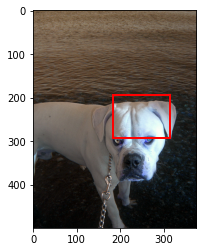

In [111]:
fig,ax = plt.subplots(1)

ax.imshow(unscaled)

rect = patches.Rectangle((x0,y0),x1-x0,y1-y0,linewidth=2,edgecolor='r',facecolor='none')

ax.add_patch(rect)

plt.show()

# Image2

Let's do the same steps we did above

In [113]:
filename = './images/Maine_Coon_192.jpg'

unscaled = cv2.imread(filename)

In [114]:
image_height,image_width,_ = unscaled.shape
image = cv2.resize(unscaled,(IMAGE_SIZE,IMAGE_SIZE))
feat_scaled = preprocess_input(np.array(image,dtype=np.float32))

In [115]:
region = model.predict(feat_scaled.reshape(1,128,128,3))[0]

In [116]:
x0 = int(region[0] * image_width / IMAGE_SIZE)
y0 = int(region[1] * image_height / IMAGE_SIZE)

x1 = int((region[0] + region[2]) * image_width / IMAGE_SIZE)
y1 = int((region[1] + region[3]) * image_width / IMAGE_SIZE)

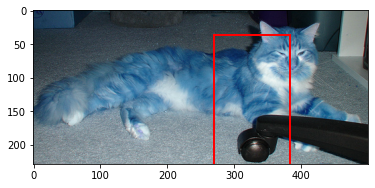

In [117]:
fig,ax = plt.subplots(1)

ax.imshow(unscaled)

rect = patches.Rectangle((x0,y0),x1-x0,y1-y0,linewidth=2,edgecolor='r',facecolor='none')

ax.add_patch(rect)

plt.show()

We can see that the bounding boxes are not fitting very accurately. This is accepted as our accuracy score on the test was around 65%